In [1]:
import joblib
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Load test data
df = pd.read_csv("C:/Users/shazi/Healthcare_Project/data/preprocessed_readmission.csv")
X = df.drop(columns=['readmission_flag'])
y = df['readmission_flag']

# Split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load models
log_model = joblib.load("C:/Users/shazi/Healthcare_Project/models/logistic_readmission_model.pkl")
rf_model = joblib.load("C:/Users/shazi/Healthcare_Project/models/random_forest_readmission_model.pkl")


In [3]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict with both models
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Function to return metrics
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

# Get results
metrics_log = get_metrics(y_test, y_pred_log)
metrics_rf = get_metrics(y_test, y_pred_rf)

# Show results
print(" Logistic Regression Metrics:")
print(metrics_log)

print("\n Random Forest Metrics:")
print(metrics_rf)


 Logistic Regression Metrics:
{'Accuracy': 0.7323290845886443, 'Precision': 0.60431654676259, 'Recall': 0.5813148788927336, 'F1-Score': 0.5925925925925926}

 Random Forest Metrics:
{'Accuracy': 0.7253765932792584, 'Precision': 0.5896551724137931, 'Recall': 0.5916955017301038, 'F1-Score': 0.5906735751295337}


In [5]:
import joblib
joblib.dump(rf_model, "C:/Users/shazi/Healthcare_Project/models/random_forest_readmission_model.pkl")
print("✅ Random Forest model saved after training!")


✅ Random Forest model saved after training!


In [6]:
rf_model = joblib.load("C:/Users/shazi/Healthcare_Project/models/random_forest_readmission_model.pkl")
y_pred_rf = rf_model.predict(X_test)


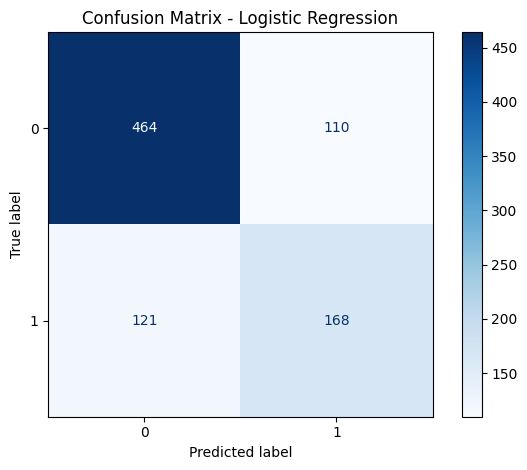

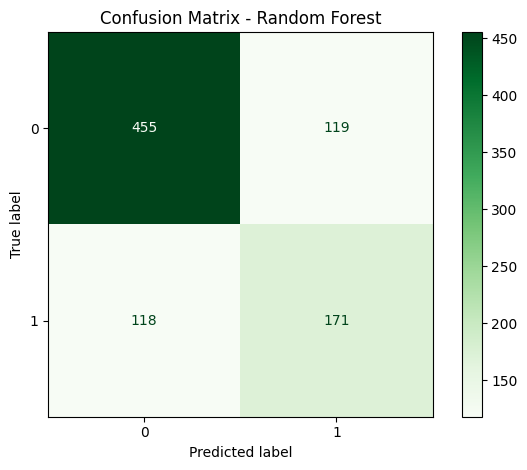

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot Logistic Regression confusion matrix
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

# Plot Random Forest confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()


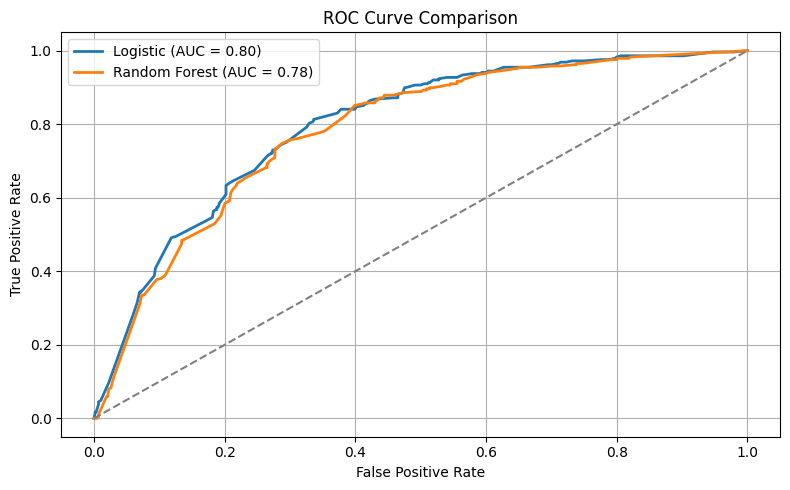

In [11]:
from sklearn.metrics import roc_curve, auc

# Probabilities
y_prob_log = log_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(fpr_log, tpr_log, label=f"Logistic (AUC = {auc_log:.2f})", linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("C:/Users/shazi/Healthcare_Project/output/roc_curve_comparison.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\shazi\AppData\Local\Temp\ipykernel_18652\2553336793.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\shazi\AppData\Local\Temp\ipykernel_18652\2553336793.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("C:/Users/shazi/Healthcare_Project/output/day7_model_comparison_chart.png")
C:\Users\shazi\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


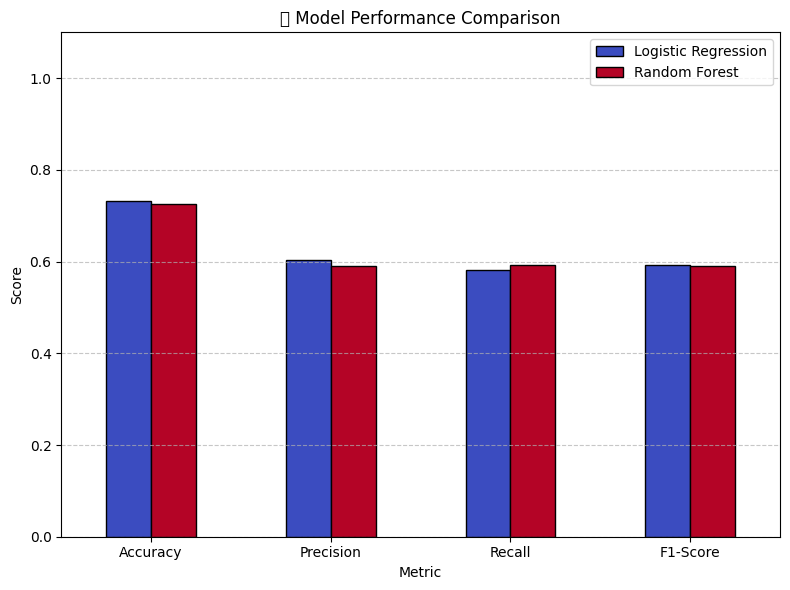

In [10]:
import matplotlib.pyplot as plt

# Organize metrics into DataFrame
comparison_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Logistic Regression": list(metrics_log.values()),
    "Random Forest": list(metrics_rf.values())
})

# Plot
comparison_df.set_index("Metric").plot(kind="bar", figsize=(8, 6), colormap="coolwarm", edgecolor="black")
plt.title("📊 Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("C:/Users/shazi/Healthcare_Project/output/day7_model_comparison_chart.png")
plt.show()
